# Seeds Dataset with Support Vectore Machines
[EDA for This dataset](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Notebooks/Seeds_EDA.ipynb)  
[Data for the same](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Data/seeds_dataset.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from yellowbrick.features import ParallelCoordinates
from matplotlib.colors import ListedColormap
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import ShuffleSplit
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix


In [2]:
#reading csv file
names = ['Area','Perimeter','Compactness','length_kernel','width_kernel','asy_coefficient','len_kernel_groove','target']
data = pd.read_csv('../../Lab1/Romil/Data/seeds_dataset.csv',header=None,names=names)
data.head()

,Area,Perimeter,Compactness,length_kernel,width_kernel,asy_coefficient,len_kernel_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
#Selecting all features
X = data.drop(['target'], axis=1).values
y = data.target.values

In [4]:
#Selecting Area and asymmetric coefficient as main features
X = data.drop(['target','Perimeter','Compactness','length_kernel','width_kernel','len_kernel_groove'],axis=1).values
y = data.target.values

In [5]:
#Splitting dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

IndexError: list index out of range

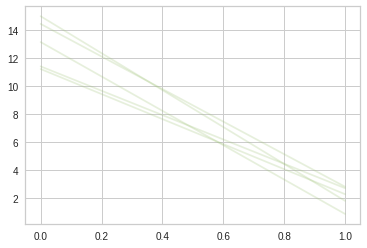

In [6]:
visualizer = ParallelCoordinates()
visualizer.fit_transform(X_train, y_train)
visualizer.poof()

In [7]:
sc = StandardScaler()
sc.fit(X_train)

# Scaling the train and test sets.
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

IndexError: list index out of range

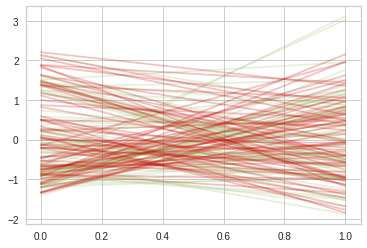

In [8]:
visualizer = ParallelCoordinates()
visualizer.fit_transform(X_train_std, y)
visualizer.poof()

In [9]:
model = svm.SVC(kernel = 'linear',C = 100, gamma = 1)

In [10]:
model.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
model.coef_

array([[-1.51858964, -0.837718  ],
       [ 1.82531173, -0.88648824],
       [ 0.98448121, -0.10187666]])

In [12]:
model.intercept_

array([ 27.38547037, -20.03341214, -13.68675288])

In [13]:
# get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(10, 20)
yy = a * xx - (model.intercept_[0]) / w[1]

w1 = model.coef_[1]
a1 = -w1[0] / w1[1]
xx1 = np.linspace(10, 20)
yy1 = a1 * xx1 - (model.intercept_[1]) / w1[1]

w2 = model.coef_[2]
a2 = -w2[0] / w2[1]
xx2 = np.linspace(10, 20)
yy2 = a2 * xx2 - (model.intercept_[2]) / w2[1]


In [14]:
# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

yy_down1 = yy1 - np.sqrt(1 + a1 ** 2) * margin
yy_up1 = yy1 + np.sqrt(1 + a1 ** 2) * margin

yy_down2 = yy2 - np.sqrt(1 + a2 ** 2) * margin
yy_up2 = yy2 + np.sqrt(1 + a2 ** 2) * margin

In [15]:
print(xx)

[10.         10.20408163 10.40816327 10.6122449  10.81632653 11.02040816
 11.2244898  11.42857143 11.63265306 11.83673469 12.04081633 12.24489796
 12.44897959 12.65306122 12.85714286 13.06122449 13.26530612 13.46938776
 13.67346939 13.87755102 14.08163265 14.28571429 14.48979592 14.69387755
 14.89795918 15.10204082 15.30612245 15.51020408 15.71428571 15.91836735
 16.12244898 16.32653061 16.53061224 16.73469388 16.93877551 17.14285714
 17.34693878 17.55102041 17.75510204 17.95918367 18.16326531 18.36734694
 18.57142857 18.7755102  18.97959184 19.18367347 19.3877551  19.59183673
 19.79591837 20.        ]


(9.435250298685784, 21.859743727598563, -5.475938724433718, 20.57004724160461)

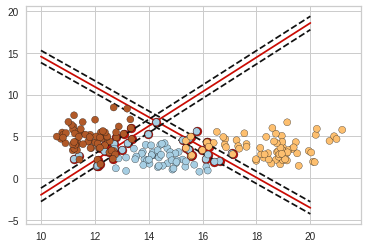

In [16]:
plt.figure()
plt.clf()
plt.plot(xx, yy, 'r-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.plot(xx1, yy1, 'r-')
plt.plot(xx1, yy_down1, 'k--')
plt.plot(xx1, yy_up1, 'k--')

#plt.plot(xx2, yy2, 'r-')
#plt.plot(xx2, yy_down2, 'k--')
#plt.plot(xx2, yy_up2, 'k--')

plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=80, zorder=1, edgecolors='k',color = 'r')
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
plt.axis('tight')

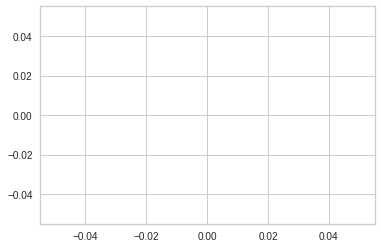

In [22]:
plt.axis('tight')
x_min = -4.8
x_max = 4.2
y_min = -6
y_max = 6

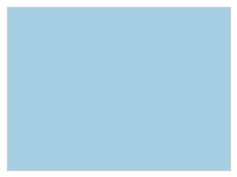

In [31]:
fignum = 1

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
plt.figure(fignum,figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
            edgecolors='k')

plt.axis('tight')
x_min = -4.8
x_max = 4.2
y_min = -6
y_max = 6

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.figure(fignum,figsize=(4, 3))
plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())


plt.show()

In [35]:
model.score(X_test_std,y_test)

0.873015873015873

In [36]:
model.predict(X_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
y_test

array([1, 2, 1, 1, 3, 2, 2, 2, 2, 3, 1, 3, 1, 3, 2, 2, 3, 1, 1, 1, 3, 1,
       1, 1, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 1, 2, 3, 1, 2, 3,
       1, 2, 2, 1, 1, 2, 1, 2, 3, 3, 1, 1, 2, 2, 2, 2, 3, 2, 2])

In [41]:
y_pred = model.predict(X_test_std)

In [42]:
metrics.accuracy_score(y_test,y_pred,normalize=False)

55

In [43]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

In [44]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

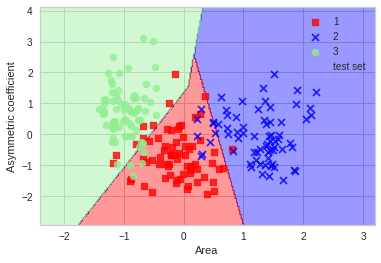

In [48]:
plot_decision_regions(X_combined,
                      y_combined, classifier=model,
                      test_idx=range(148,210))
plt.xlabel('Area')
plt.ylabel('Asymmetric coefficient')
plt.legend(loc='best')

In [46]:
# Defining the function to plot the learning curve:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

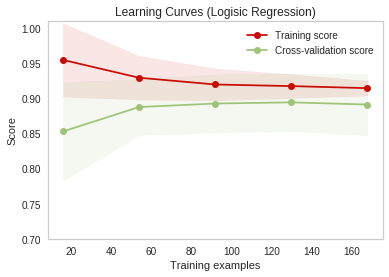

In [47]:
# Plotting for Logistic Regression
title = "Learning Curves (Logisic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = svm.SVC(kernel='linear',gamma = 1)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)



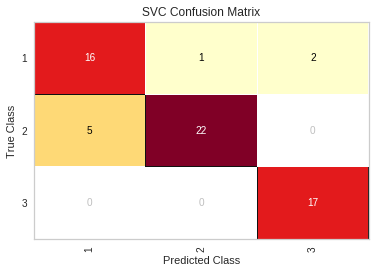

In [51]:
#Plotting the confusion matrix to understand the true positives and negatives and the false positives and negatives

cm = ConfusionMatrix(model, classes=[1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

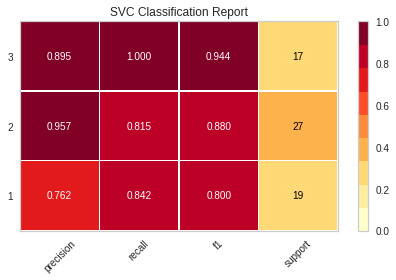

In [53]:
# Generating the classification report containing measures of precision, recall and F1-score
visualizer = ClassificationReport(model, support=True)
visualizer.fit(X_train_std, y_train)
visualizer.score(X_test_std, y_test)
visualizer.poof()